# Natural Language Processing - Sentiment Analysis

by [Coursera Project Network](https://www.coursera.org/learn/twitter-sentiment-analysis/home/welcome)

<hr>

### Objective: 
Use Machine Learning techniques to identify key words and phrases and classify them as a detrimental or beneficial review (positive or negative).

<hr>

### Step 1: Import Dependencies

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from jupyterthemes import jtplot

# wordcloud
from wordcloud import WordCloud

# Natural Language tool kit for stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords.words('english')

# CountVectorization from sklearn
from sklearn.feature_extraction.text import CountVectorizer

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gianm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<hr>

### Step 2: Load the data and observe

In [220]:
tweets_df = pd.read_csv("resources/twitter.csv")
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#### Note: This is a supervised learning method of sentiment analysis. Notice how the 'label' is binary 0 or 1. The model will be trained on this output variable. 

- 0 stands for a positive sentiment
- 1 stands for a negative sentiment

In [221]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [222]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### Step 2a: Monitor the tweets to make sure the dataset makes sense

In [223]:
tweets_df['tweet'][:10]

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object

<hr>

### Step 3: Data Preprocessing

In [224]:
# Drop the ID column because it is unnecessary

tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


c:\users\gianm\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

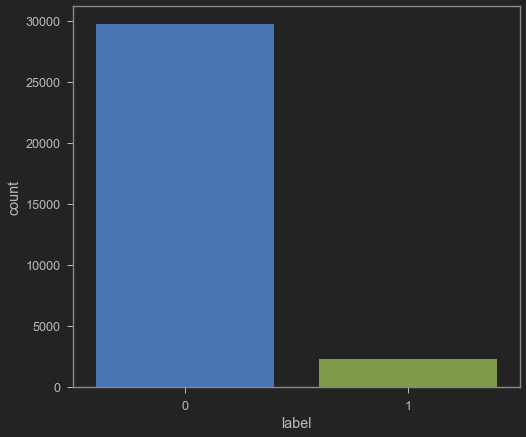

In [225]:
# Histogram showing the data. Amount of positive vs Amount of negative that is in my data

# tweets_df.hist(bins = 30, figsize=(13,5), color="b")
sns.countplot(tweets_df['label'], label = 'count')

<strong>Notice the difference in positive tweets and negative tweets.</strong>

<AxesSubplot:>

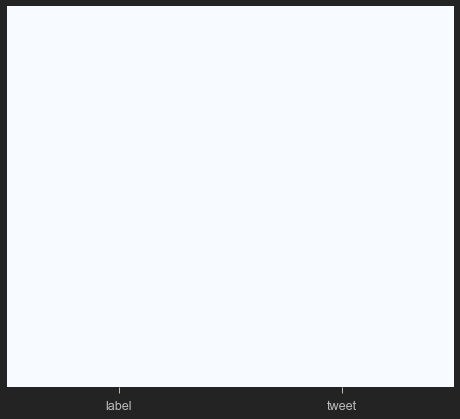

In [226]:
# Check for any null values
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

# Empty = no null values

In [227]:
# Create a new column in the dataframe that has the length of each tweet
tweets_df['length'] = tweets_df['tweet'].apply(len)

tweets_df.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


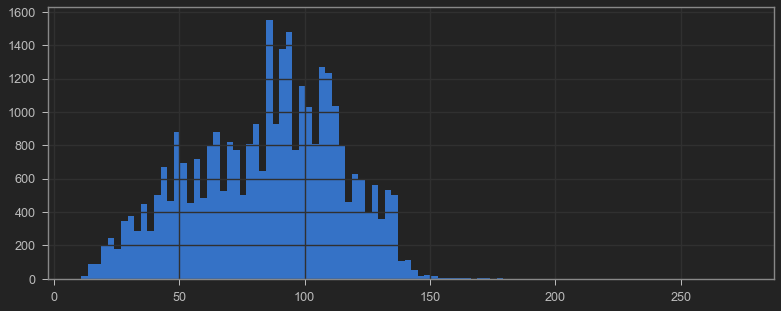

In [228]:
# Plot the length of the tweets to see a holistic view of the length of tweets in the data
tweets_df['length'].hist(bins = 100, figsize=(13,5), color="b")

tweets_df.describe()

# tweets_df['length'].plot(bins=100, kind='hist')

<strong>It looks like the average length of tweets is around 80-100.</strong>

In [229]:
# Knowing min and max lengths, I want to see the longest and shortest tweet in the data
shortest = tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]
longest = tweets_df[tweets_df['length'] == 274]['tweet'].iloc[0]
average = tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

print(f"Shortest Tweet: {shortest}")
print("-" * 10)
print(f"Longest Tweet: {longest}")
print("-" * 10)
print(f"Average Tweet: {average}")

Shortest Tweet: i love you 
----------
Longest Tweet:  @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ðððððððððððð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð±ð±ð¤ð¤ð±ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ðððððððâ¦
----------
Average Tweet: my mom shares the same bihday as @user   bihday snake! see you this weekend ðð¼


In [230]:
# Put all positive tweets in a variable. Again for negative tweets
positive = tweets_df[tweets_df['label'] == 0]
negative = tweets_df[tweets_df['label'] == 1]

<hr>

### Step 4: Creating the Word Cloud: Ensure the data makes sense

In [231]:
# Store the tweets into a variable
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [232]:
# join all the sentences into one long string
combined_sentences = " ".join(sentences)

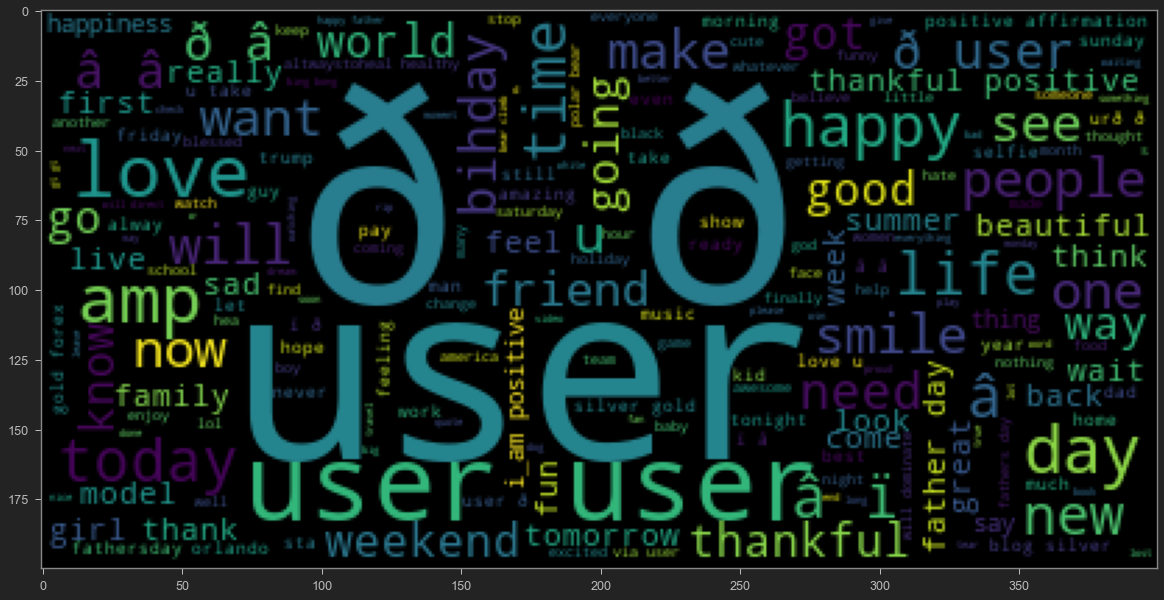

In [233]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(combined_sentences))

<strong>The larger texts are the most used words and symbols in the wordcloud</strong>

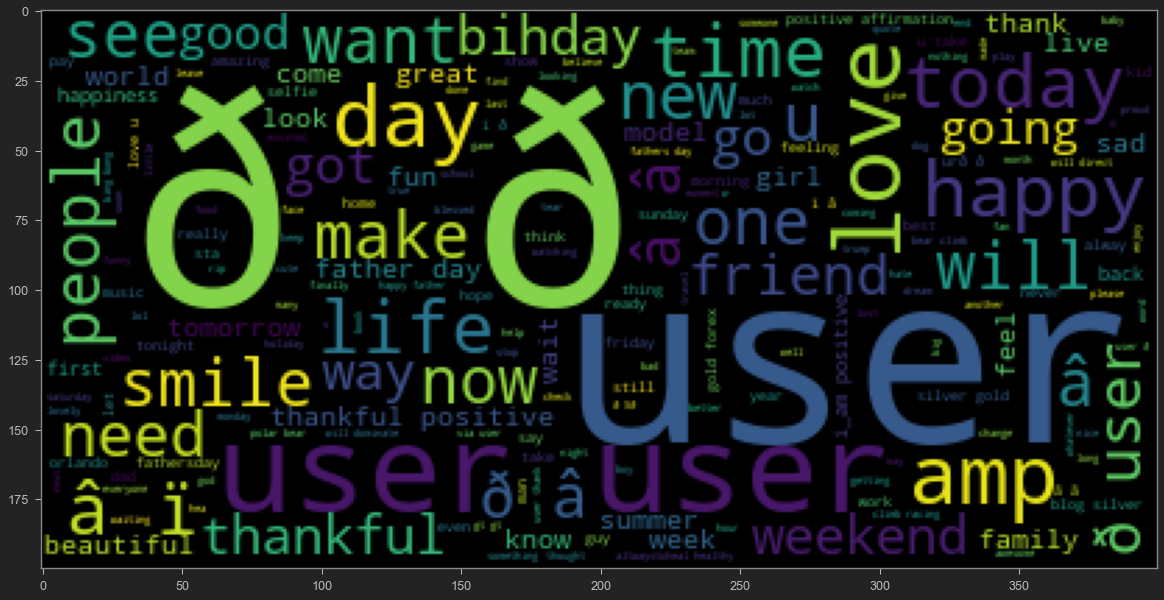

In [234]:
# visualizing the positive tweets
positive_sentences = positive['tweet'].tolist()
pos_sentence = " ".join(positive_sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_sentence))

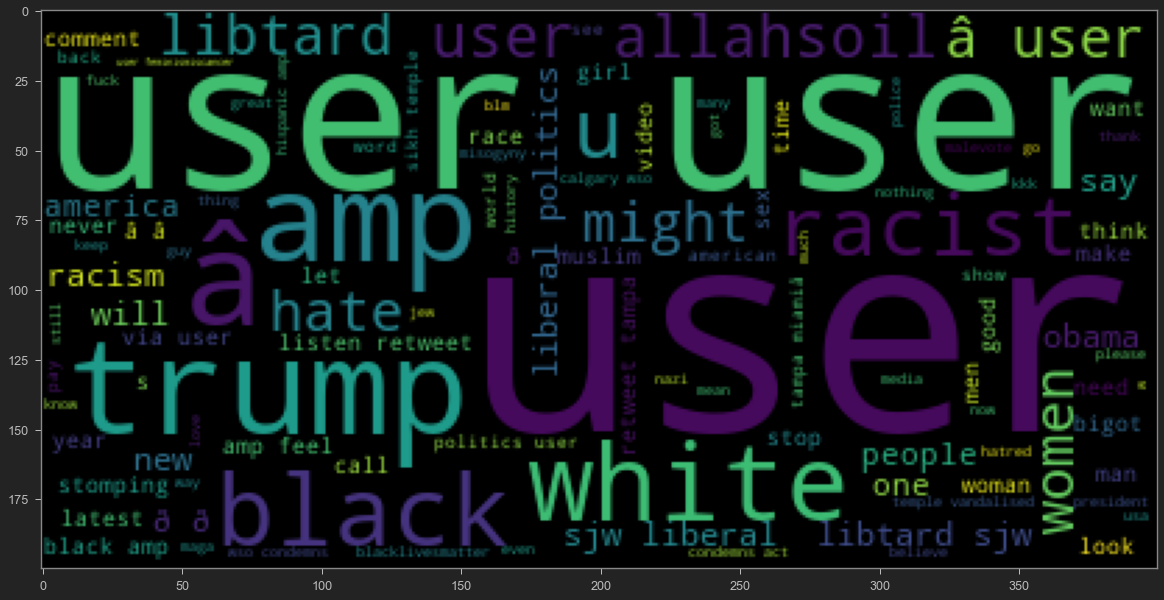

In [235]:
# visualizing the negative tweets
negative_sentences = negative['tweet'].tolist()
neg_sentence = " ".join(negative_sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentence))

<hr>

### Step 5: Data Cleaning: remove punctuations, stopwords, and perform vectorization/tokenization

<img src="images/tokenization.png">

In [245]:
# Funtion to clean all tweets

def tweet_cleaning(s):
    removed_punc = "".join([ i for i in s if i not in string.punctuation ])
    removed_stop = [ w for w in removed_punc.split() if w.lower() not in stopwords.words('english') ]
    return removed_stop

cleaned_tweets = tweets_df['tweet'].apply(tweet_cleaning)
print(cleaned_tweets[5])
print(tweets_df['tweet'][5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [250]:
# apply count vectorization from sklearn

vectorizer = CountVectorizer(analyzer = tweet_cleaning)
tweet_vectorizer = CountVectorizer(analyzer=tweet_cleaning, dtype='uint8').fit_transform(tweets_df['tweet']).toarray()

tweet_vectorizer.shape

(31962, 47386)

In [251]:
# Assign the vectorizer as the x and the labels as the y
X = tweet_vectorizer
y = tweets_df['label']

### Naive Bayes Method Overview

<img src='images/bayes.png'>

In the image above, a client walks in and tells you their age and their savings.  
Any age and savings amount that reaches blue have features that make them eligible for retirement.  
Any in read are not advisable to retire.

When a new client walks in, the Bayes method would be used to tell if they are ready for retirement based on which class they are (red vs blue)

<hr>

<img src='images/bayes1.png'>

<strong>Prior Probability</strong>: the chances that a new client will be labeled as eligible or not. This is based on the numbers already in the data and excluding the new client. In other words, #red / total and #blue/total

<hr>

<img src='images/bayes2.png'>

<strong>Likelihood</strong>: If we draw a circle around the new point, we use the amount of blue and red in the vicinity to classify whether the new client is eligible or not. #redinvicinity / total red and #blueinvicinity/total blue

<hr>

<img src='images/bayes3.png'>

<strong>Posterior Probability</strong>: Combining both prior probability and likelihood to create posterior probability. 

- Prior Probability states that the new client should be blue (66.67% of total is blue).
- Likelihood states that new client should be read (15% red vs 2.5% blue, or 75% of vicinity is red)
- Posterior Probability: red is 0.33 * 0.15 == 0.05 or 5% and blue is .6667 * 0.025 == 0.0167 or 1.67%

<strong>The client will be classified as red or non-eligible because the red Posterior Probability is higher.</strong>